# Краткое описание датасета
Датасет представляет собой набор характеристик белого и красного вина, а так же оценку качества вина (по 10-бальной шкале) в соответствии с этими характеристиками

### Атрибуты
Датасет состоит только из числовых атрибутов - все они типа float, кроме оценки вина.
Имеются следующие атрибуты:
- fixed acidity        - общая кислотность вина в г/дм3
- volatile acidity     - количество уксусной кислоты в г/дм3
- citric acid          - количество лимонной кислоты в г/дм3
- residual sugar       - остаточный сахар в г/дм3
- chlorides            - количество соли в в г/дм3
- free sulfur dioxide  - количество свободного диоксида серы (сернистый газ) в мг/дм3
- total sulfur dioxide - общее количество диоксида серы (сернистый газ) в мг/дм3
- density              - плотность вина в г/дм3
- pH                   - концентрация ионов водорода в жидкости (pH уровень)
- sulphates            - количество сульфатов в г/дм3
- alcohol              - процентное содержание алкоголя
- quality              - оценка качества вина по шкале от 0 до 10

### Источик данных и характер данных
Датасет взят из: https://www.kaggle.com/datasets/abdullah0a/wine-quality-red-white-analysis-dataset/data.
Автор не указал источник и характер данных, но можно предположить, что данные являются реальными, а не имитационными

### Описание задачи анализа
Описания задачи анализа как такового нет.
Оценивая датасет, можно сказать, что он отлично подойдет для задач классификации и регрессии (по атрибуту quality), а так же для задачи кластеризации (по характеристикам вина определить его сухость/сладость)

# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
red_wine=pd.read_csv('../dataset/wine-quality Red.csv')
white_wine=pd.read_csv('../dataset/wine-quality White.csv')

In [3]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
red_wine.shape

(1599, 12)

In [6]:
white_wine.shape

(4898, 12)

## Пропущенные значения

In [7]:
# red
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
# white
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [10]:
white_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Как видно, пропущенных значений нет ни у датасета с красным вином, ни у датасета с белым

## СКО + среднее

In [11]:
# red
red_wine.std()

fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047065
free sulfur dioxide     10.460157
total sulfur dioxide    32.895324
density                  0.001887
pH                       0.154386
sulphates                0.169507
alcohol                  1.065668
quality                  0.807569
dtype: float64

In [12]:
red_wine.mean()

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

In [13]:
# white
white_wine.std()

fixed acidity            0.843868
volatile acidity         0.100795
citric acid              0.121020
residual sugar           5.072058
chlorides                0.021848
free sulfur dioxide     17.007137
total sulfur dioxide    42.498065
density                  0.002991
pH                       0.151001
sulphates                0.114126
alcohol                  1.230621
quality                  0.885639
dtype: float64

In [14]:
white_wine.mean()

fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
quality                   5.877909
dtype: float64

## Гистограмма распределений значений

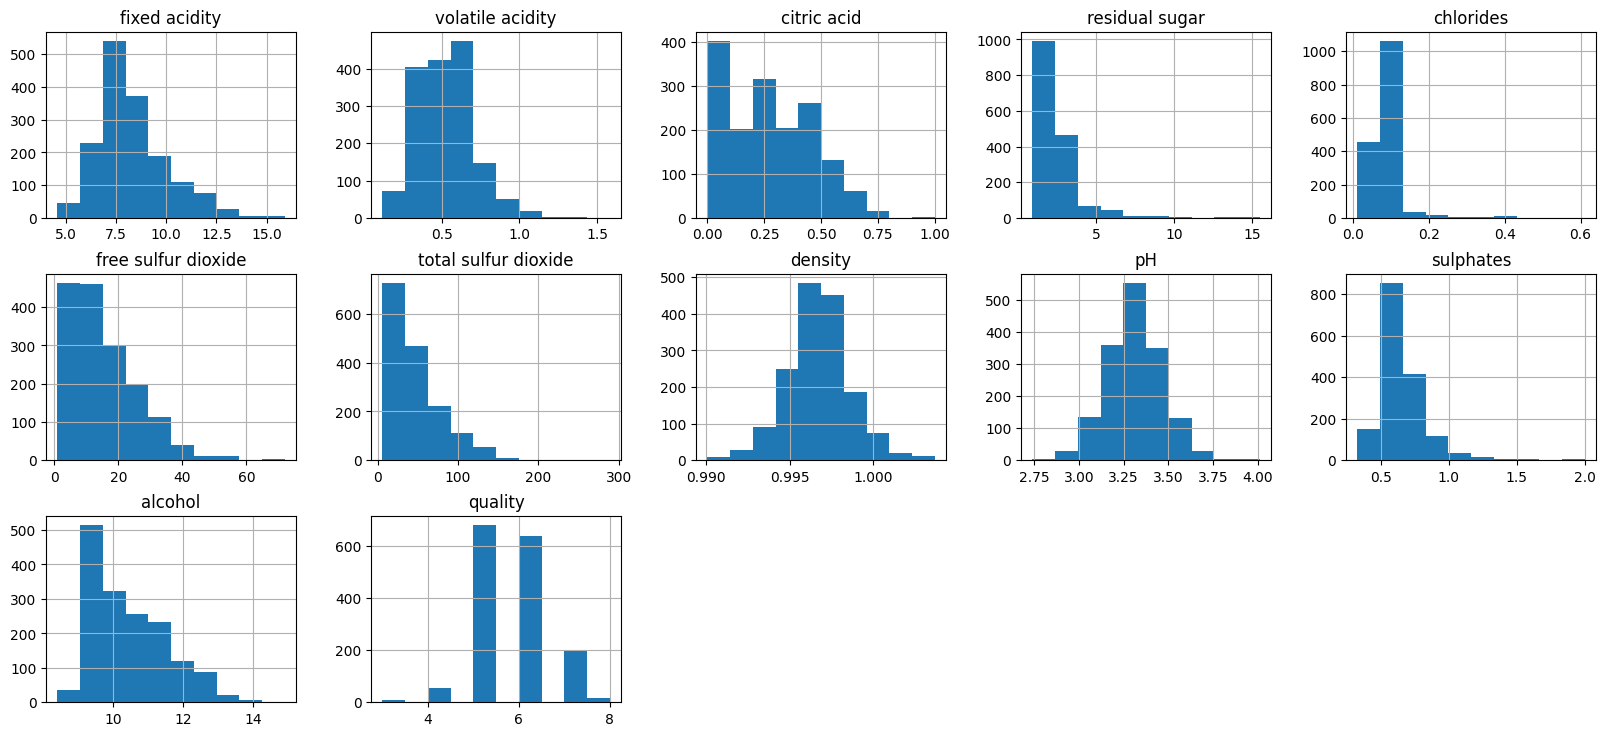

In [15]:
# red
fig = red_wine.hist(layout=(5,5), figsize=(20,15))

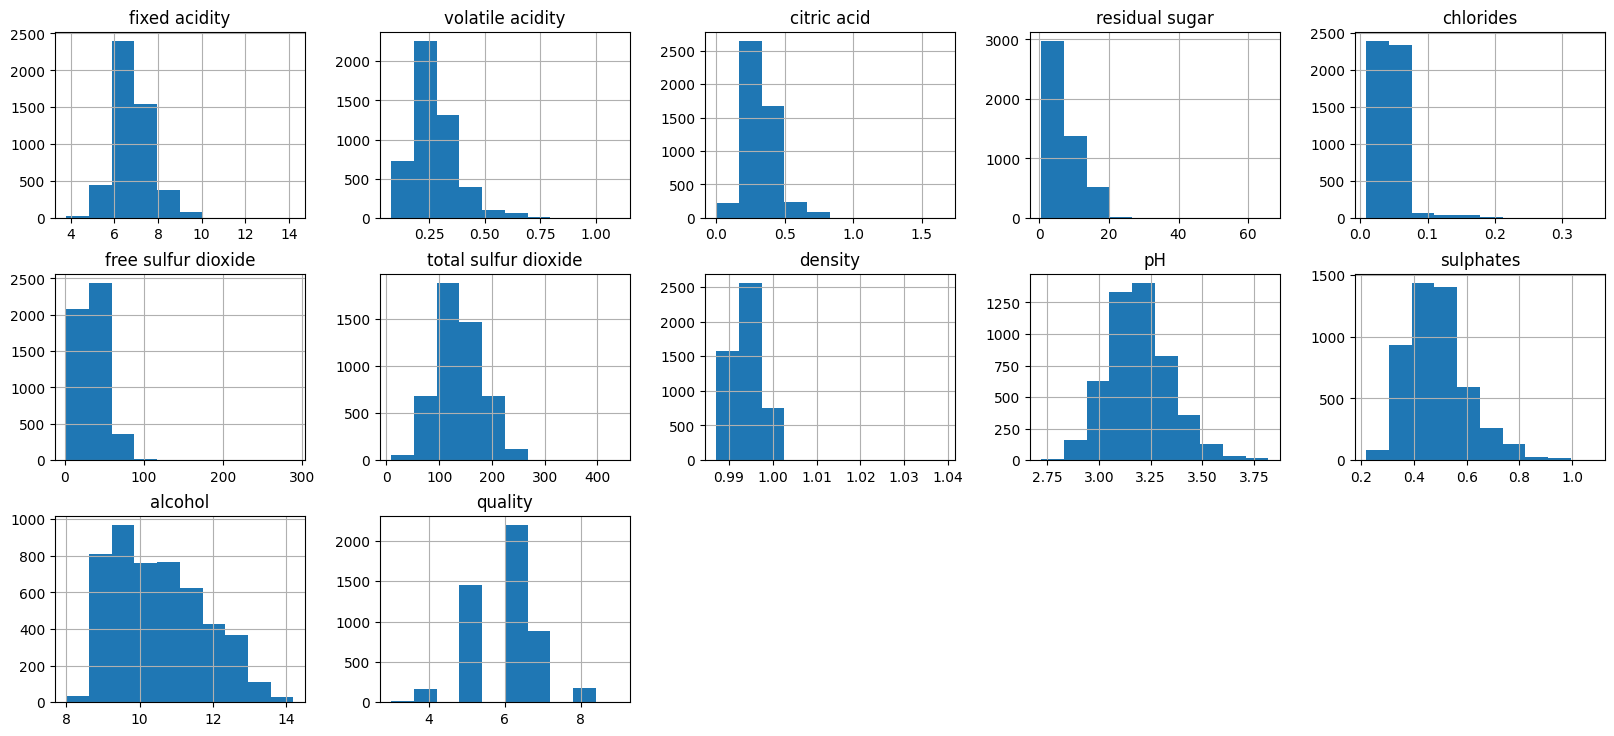

In [16]:
# white
fig = white_wine.hist(layout=(5,5), figsize=(20,15))

## Выбросы

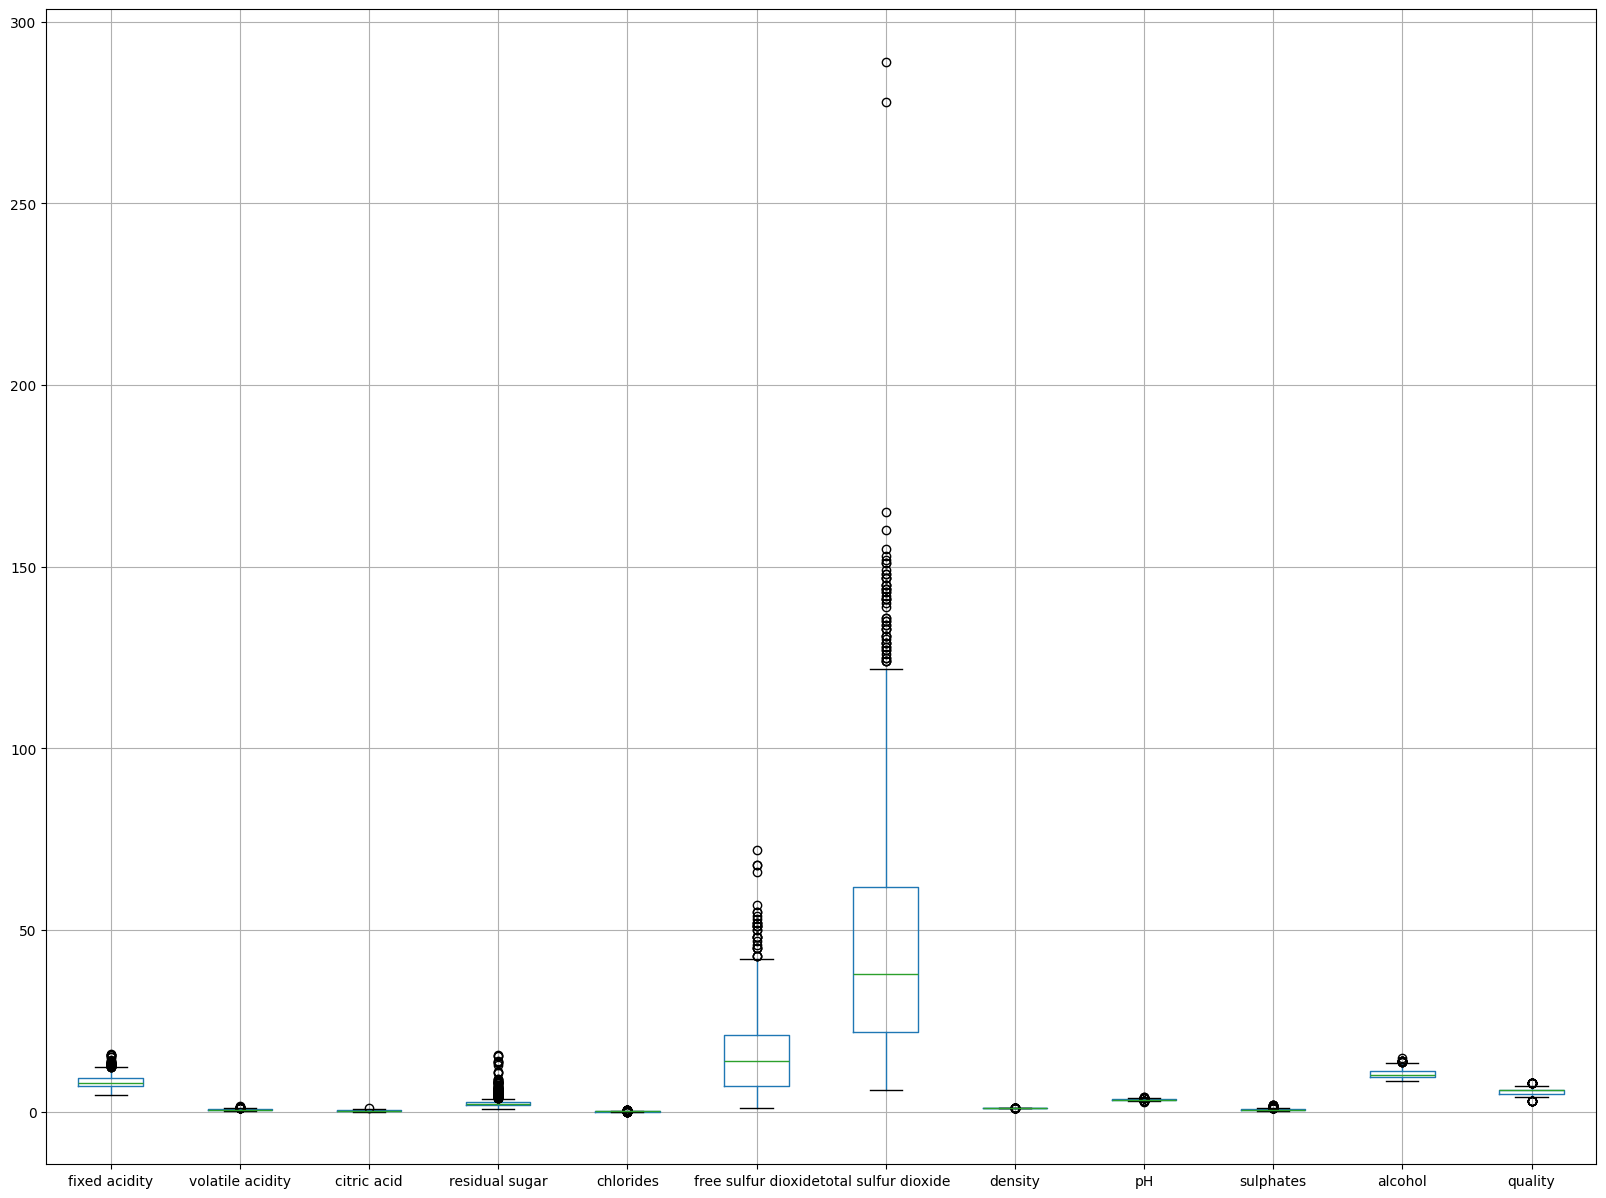

In [17]:
# red
fig = red_wine.boxplot(figsize=(20,15))

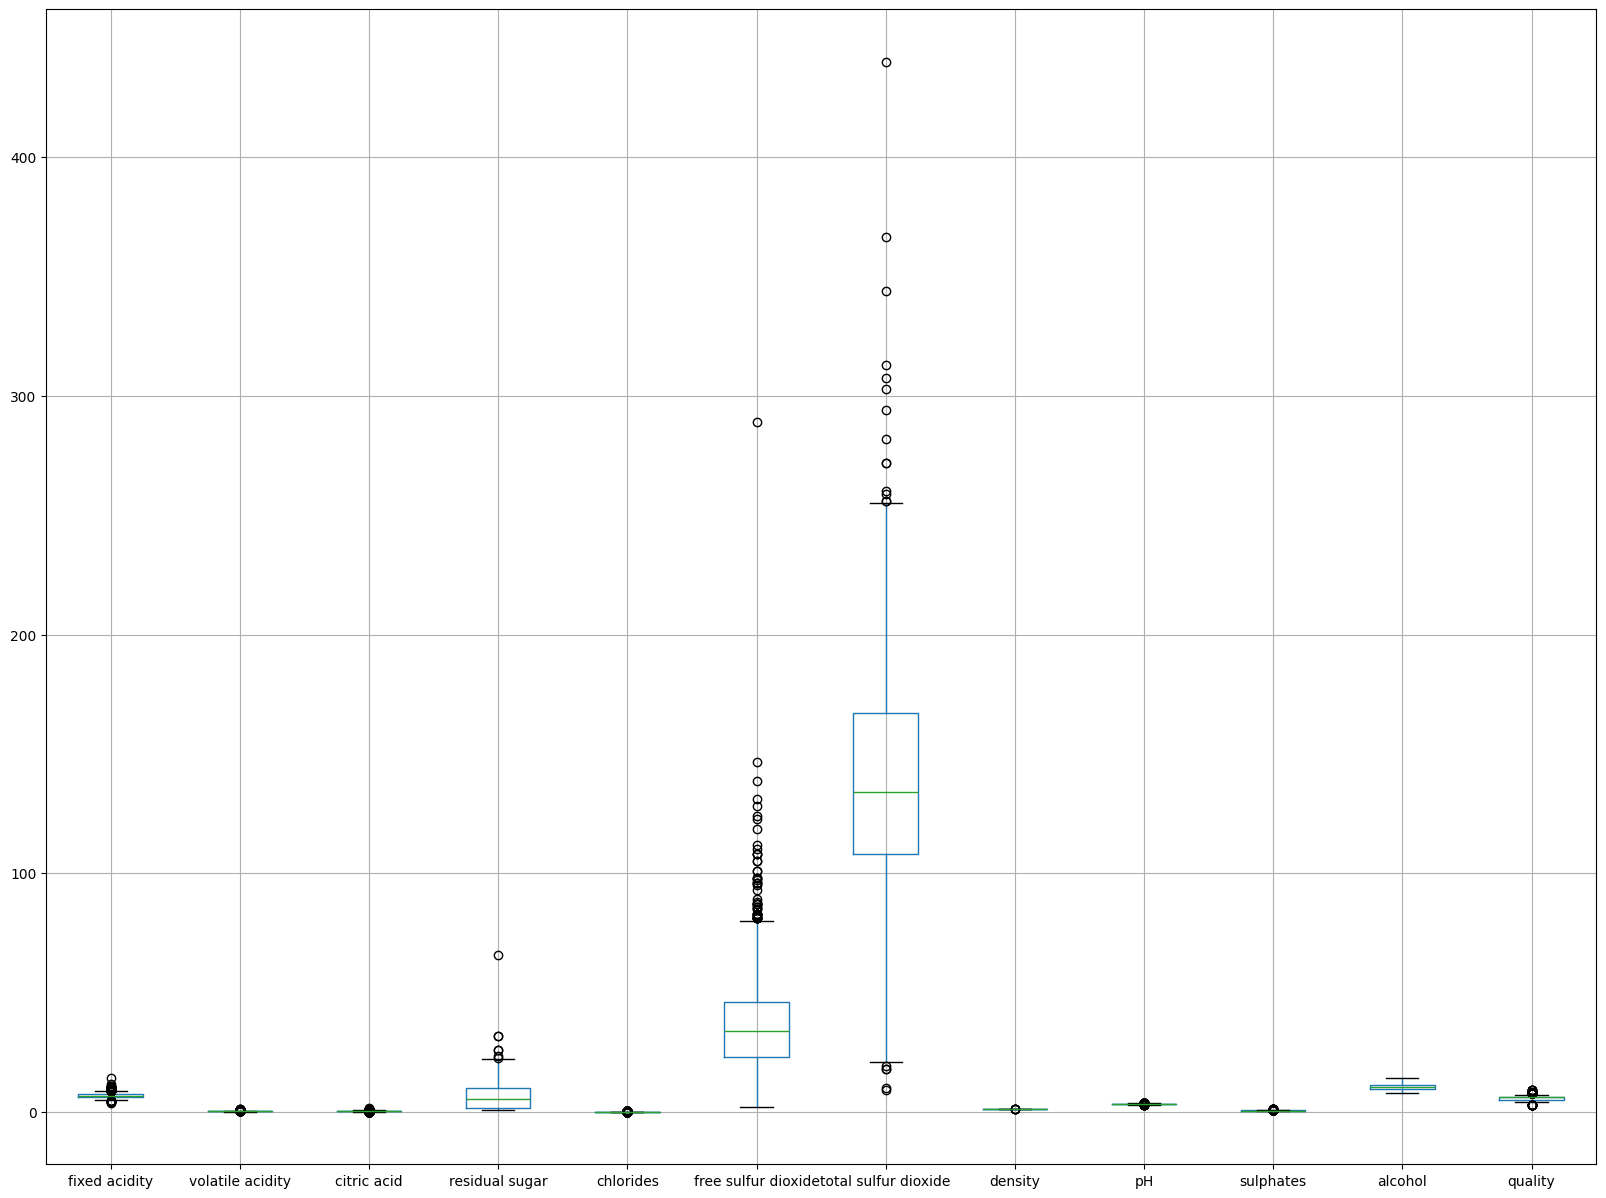

In [18]:
# white
fig = white_wine.boxplot(figsize=(20,15))

Как видно из графиков, выбросы есть

## Корреляция

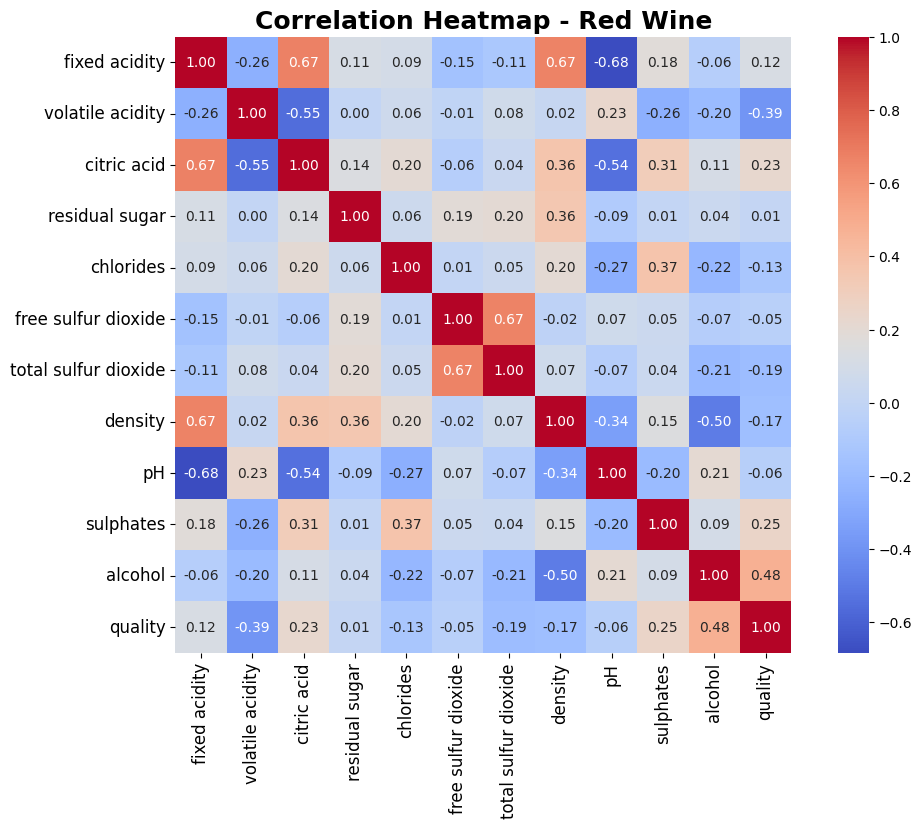

In [19]:
# red
plt.figure(figsize=(12, 8))
sns.heatmap(
    red_wine.corr(), 
    annot=True, 
    fmt=".2f", 
    square=True, 
    cmap="coolwarm",
)
plt.title('Correlation Heatmap - Red Wine', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Объяснение (красное вино)
Сильной корреляции (модуль > 0.70) между атрибутами нет

Умеренная корреляция (0.30 < модуль < 0.70):
- fixed acidity и citric acid - прямая корреляция
- fixed acidity и density - прямая корреляция
- fixed acidity и pH - обратная корреляция
- volatile acidity и citric acid - обратная корреляция
- volatile acidity и quality - обратная корреляция
- citric acid и density - прямая корреляция
- citric acid и pH - обратная корреляция
- citric acid и sulphates - прямая корреляция
- residual sugar и density - прямая корреляция
- chlorides и sulphates - прямая корреляция
- free sulfur dioxide и total sulfur dioxide - прямая корреляция
- density и pH - обратная корреляция
- density и alhocol - обратная корреляция
- аlcohol и quality - прямая корреляция

Остальные атрибуты имеют слабую корреляцию или не имеют корреляции вообще

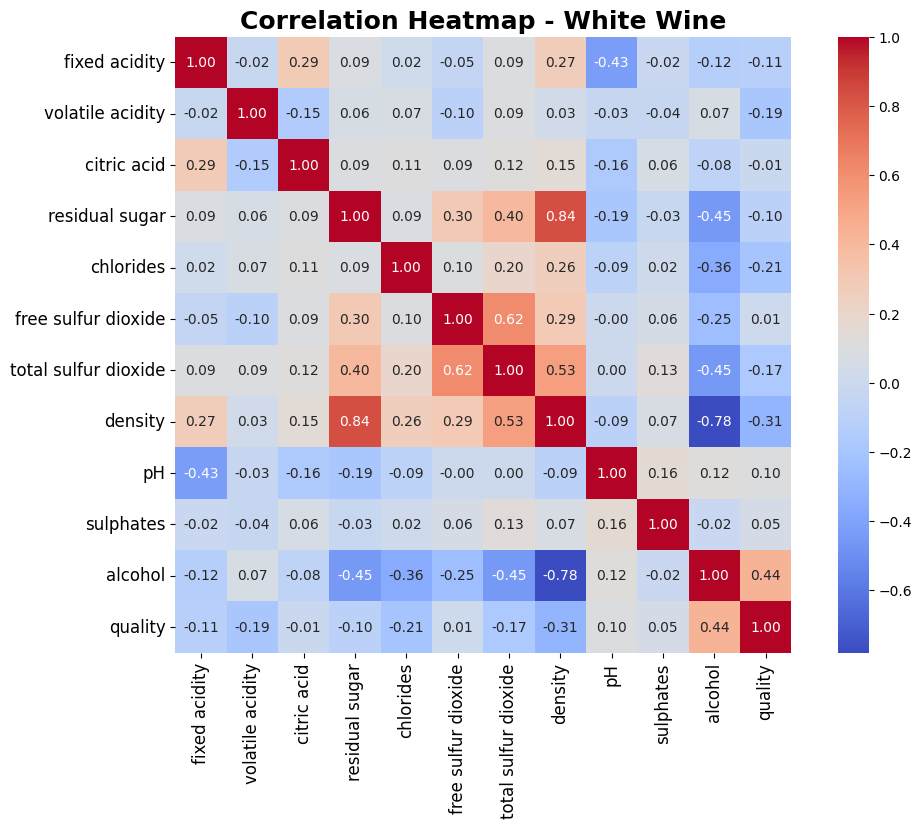

In [20]:
# white
plt.figure(figsize=(12, 8))
sns.heatmap(
    white_wine.corr(), 
    annot=True, 
    fmt=".2f", 
    square=True, 
    cmap="coolwarm",
)
plt.title('Correlation Heatmap - White Wine', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Объяснение (белое вино)

Сильная корреляция (модуль > 0.70):
- residual sugar и density - прямая корреляция
- density и alcohol - обратная корреляция

Умеренная корреляция (0.30 < модуль < 0.70):
- fixed acidity и pH - обратная корреляция
- citric acid и density - прямая корреляция
- residual sugar и free sulfur dioxide - прямая корреляция
- residual sugar и total sulfur dioxide - прямая корреляция
- residual sugar и аlcohol - обратная корреляция
- chlorides и аlcohol - обратная корреляция
- free sulfur dioxide и total sulfur dioxide - прямая корреляция
- total sulfur dioxide и  density - прямая корреляция
- density и quality - обратная корреляция
- аlcohol и quality - прямая корреляция

Остальные атрибуты имеют слабую корреляцию или не имеют корреляции вообще

## Графики рассеиания

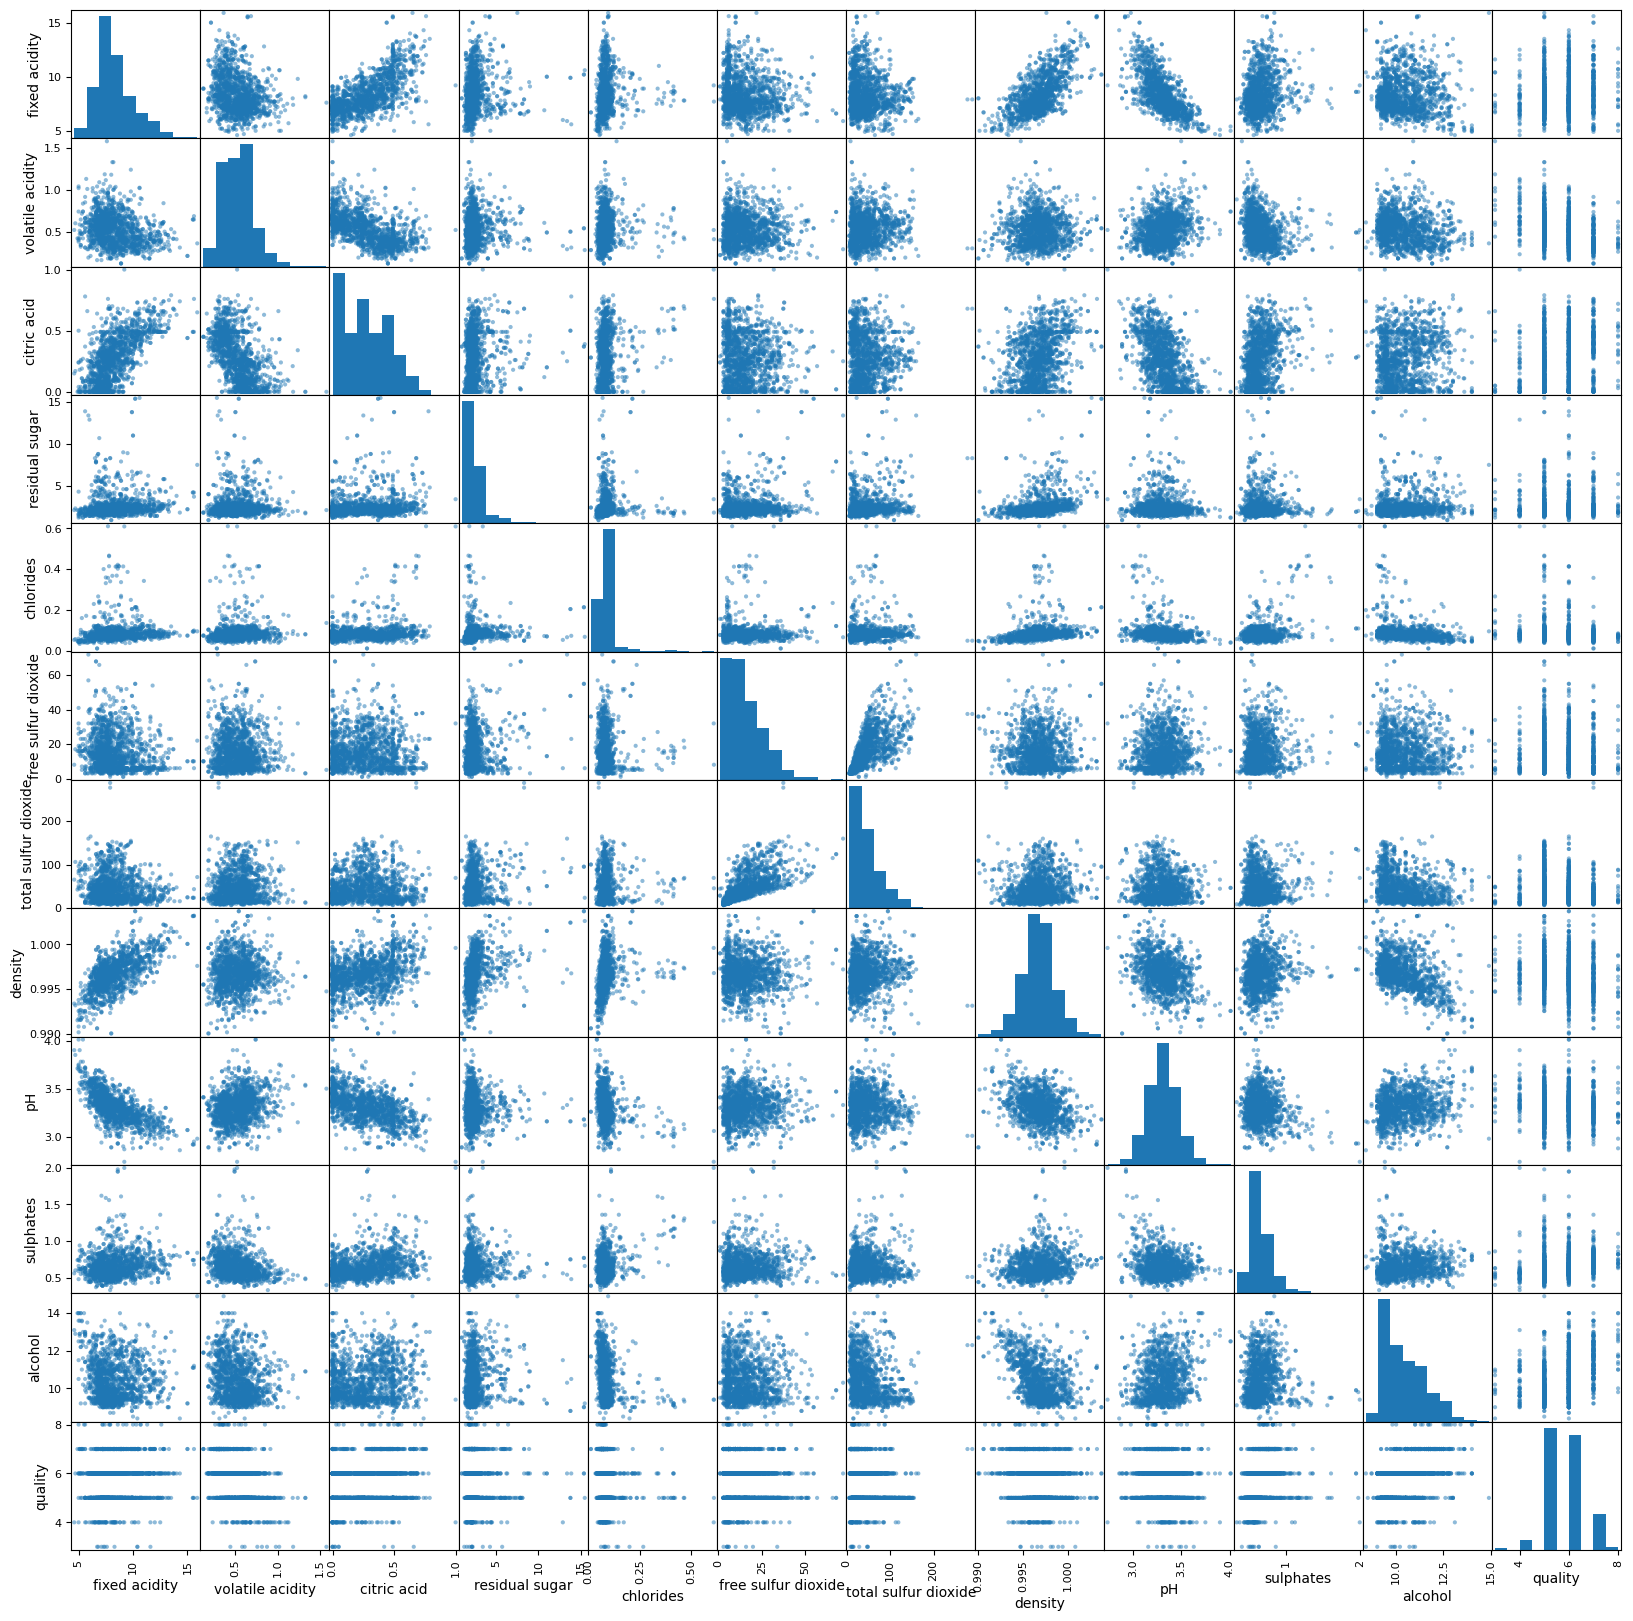

In [21]:
# red
mat = pd.plotting.scatter_matrix(red_wine, figsize=(20,20))

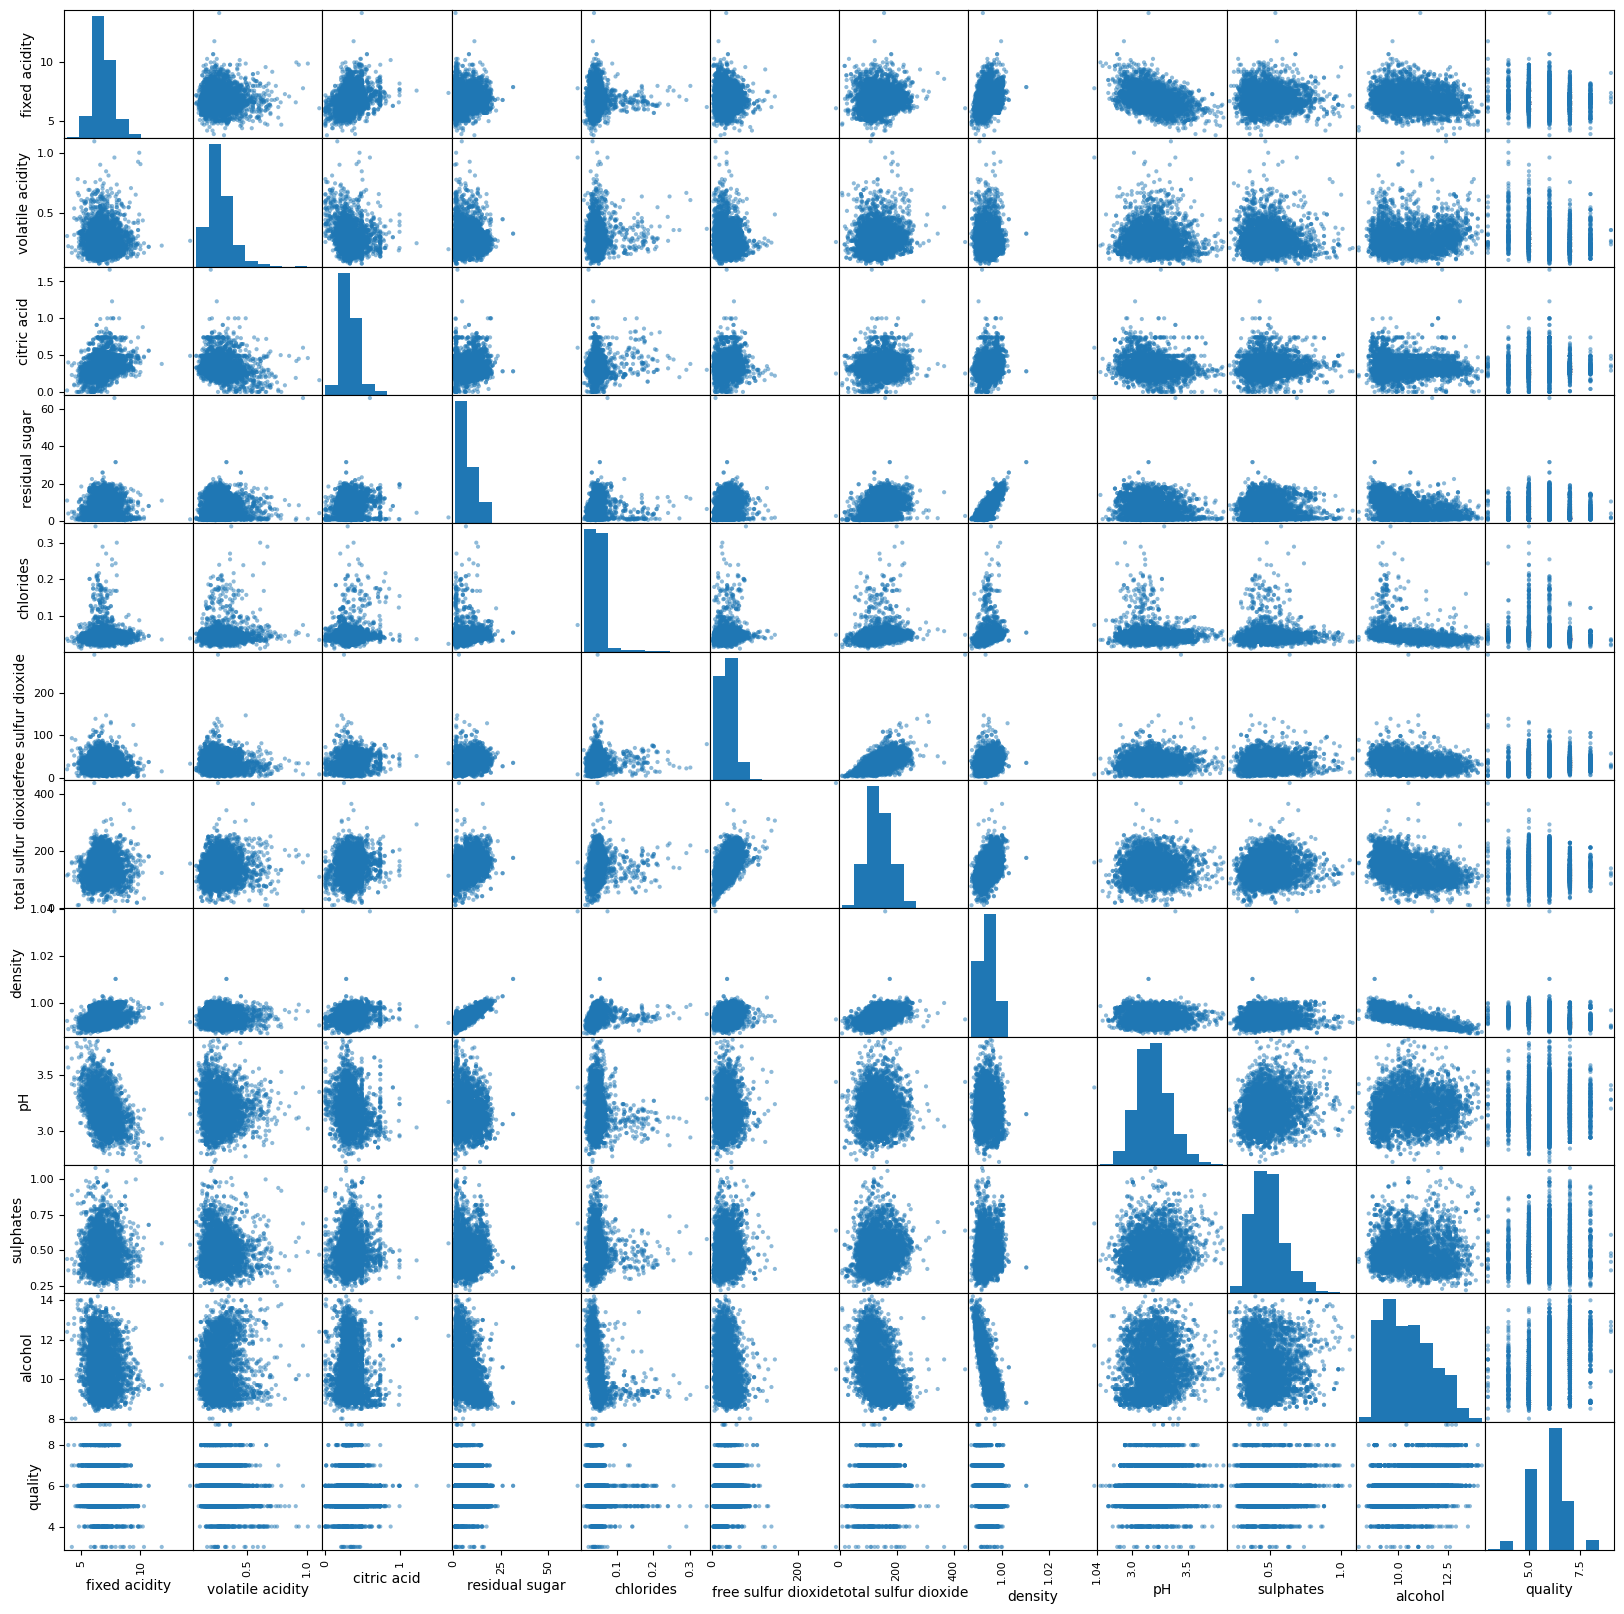

In [22]:
# white
mat = pd.plotting.scatter_matrix(white_wine, figsize=(20,20))

#### Объяснение
Графики рассеивания должны отражать информацию из матрицы корреляции.
Чем сильнее атрибуты коррелируют - тем сильнее рассеянные точки будут напоминать прямую линию (например residual sugar - density для белого вина, fixed acidity - pH для красного). Это логично - ведь корреляция показывает, насколько сильно атрибуты находятся в линейной зависимости друг от друга.

Если корреляция прямая - рассеивание будет проиходить вдоль прямой `y = kx + b, k > 0`, если обратная - вдоль прямой `y = kx + b. k < 0`